## 1) SearchTrend.csv 분석

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/HOME/Desktop/수DA쟁이/20201127_TEAMPROJECT_4/코로나19/coronavirusdataset_20200601/SearchTrend.csv")
data

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1608,2020-05-27,0.11326,0.05254,0.13017,3.93397
1609,2020-05-28,0.12081,0.04581,0.13890,5.55656
1610,2020-05-29,0.16454,0.04599,0.11699,4.95803
1611,2020-05-30,0.12208,0.03299,0.09090,3.41698


In [2]:
len(data)

1613

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1613 non-null   object 
 1   cold         1613 non-null   float64
 2   flu          1613 non-null   float64
 3   pneumonia    1613 non-null   float64
 4   coronavirus  1613 non-null   float64
dtypes: float64(4), object(1)
memory usage: 63.1+ KB


In [4]:
data.isnull().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [5]:
a = data[(data['date'] >= '2020-01-01') & (data['date'] <= '2020-05-31')]
a

,date,cold,flu,pneumonia,coronavirus
1461,2020-01-01,0.14454,0.48434,0.44880,0.01699
1462,2020-01-02,0.19508,0.85751,0.36471,0.01827
1463,2020-01-03,0.19581,0.80443,0.46598,0.02845
1464,2020-01-04,0.60343,0.86961,0.49571,0.02136
1465,2020-01-05,0.20081,0.84152,0.41644,0.01927
...,...,...,...,...,...
1608,2020-05-27,0.11326,0.05254,0.13017,3.93397
1609,2020-05-28,0.12081,0.04581,0.13890,5.55656
1610,2020-05-29,0.16454,0.04599,0.11699,4.95803
1611,2020-05-30,0.12208,0.03299,0.09090,3.41698


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [24]:
a.set_index('date')

,cold,flu,pneumonia,coronavirus
date,,,,
2020-01-01,0.14454,0.48434,0.44880,0.01699
2020-01-02,0.19508,0.85751,0.36471,0.01827
2020-01-03,0.19581,0.80443,0.46598,0.02845
2020-01-04,0.60343,0.86961,0.49571,0.02136
2020-01-05,0.20081,0.84152,0.41644,0.01927
...,...,...,...,...
2020-05-27,0.11326,0.05254,0.13017,3.93397
2020-05-28,0.12081,0.04581,0.13890,5.55656
2020-05-29,0.16454,0.04599,0.11699,4.95803


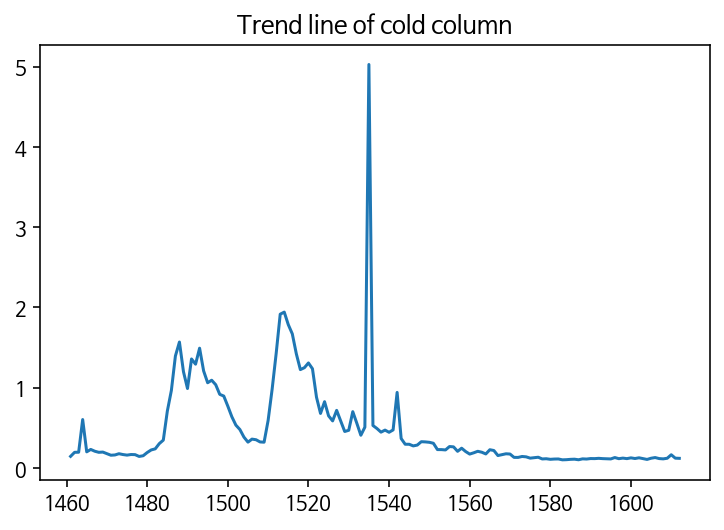

In [25]:
a['cold'].plot(title = 'Trend line of cold column')

<Figure size 2160x1080 with 0 Axes>

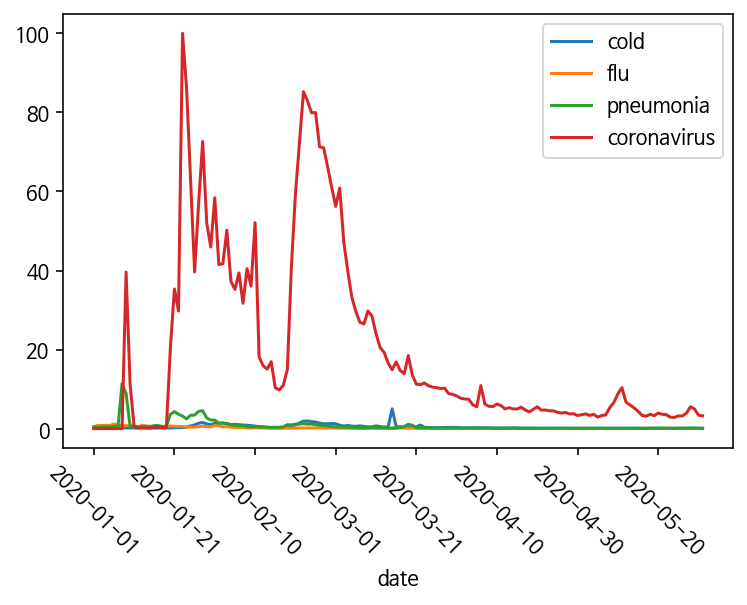

<Figure size 2160x1080 with 0 Axes>

In [11]:
new = a.set_index('date')
new['2020-01-01':'2020-05-31'].plot()
plt.xticks(rotation=-45)
plt.figure(figsize = (30,15))

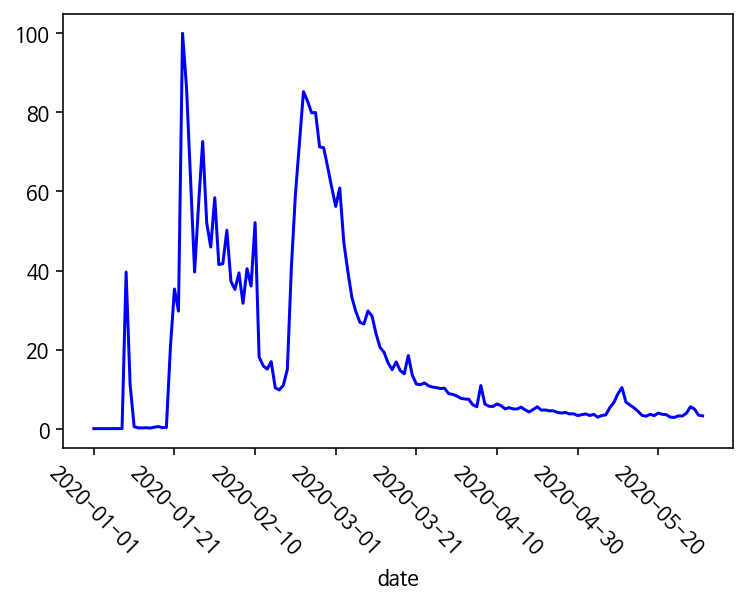

In [12]:
new['coronavirus'].plot(color = 'blue', label = 'coronavirus')
plt.xticks(rotation=-45)
plt.show()

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text xticklabel objects>)

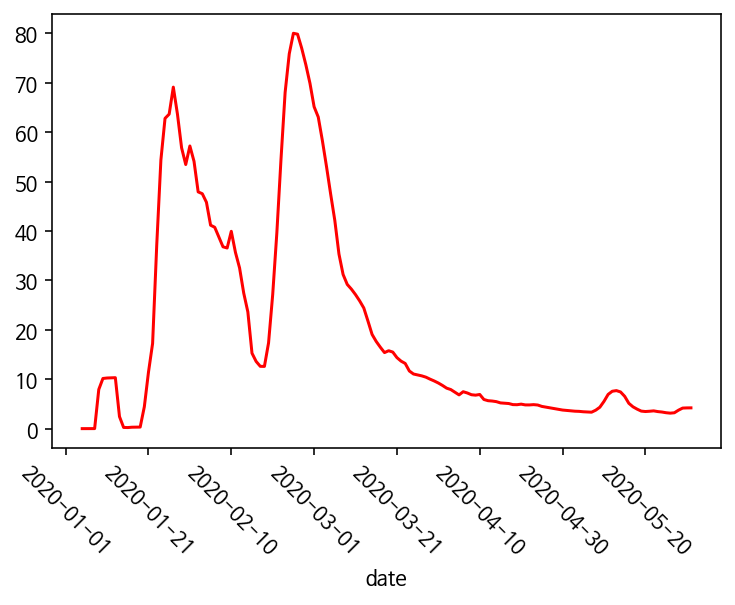

In [13]:
roll_mean5= pd.Series.rolling(new['coronavirus'], window=5, center = False).mean()
roll_mean5.plot(color='red')
plt.xticks(rotation=-45)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

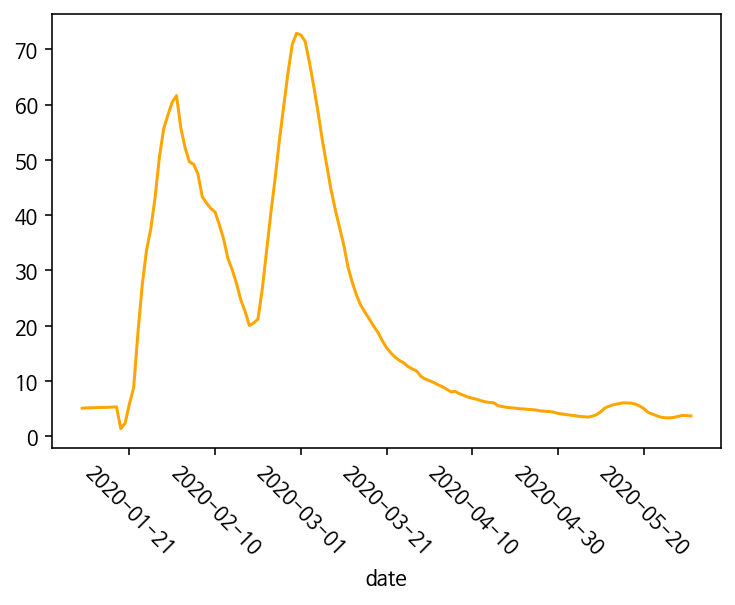

In [14]:
roll_mean10= pd.Series.rolling(new['coronavirus'], window=10, center = False).mean()
roll_mean10.plot(color='orange')
plt.xticks(rotation=-45)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

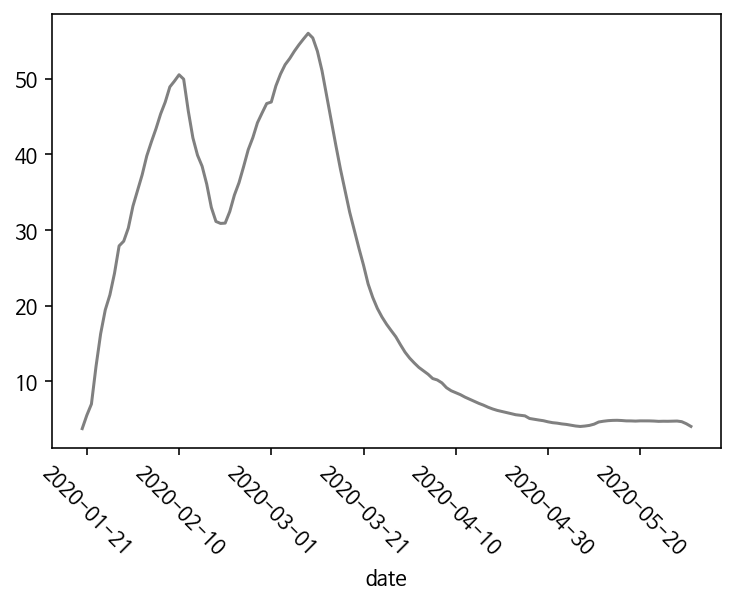

In [22]:
roll_mean20= pd.Series.rolling(new['coronavirus'], window=20, center = False).mean()
roll_mean20.plot(color='grey')
plt.xticks(rotation=-45)

KeyError: 'date'

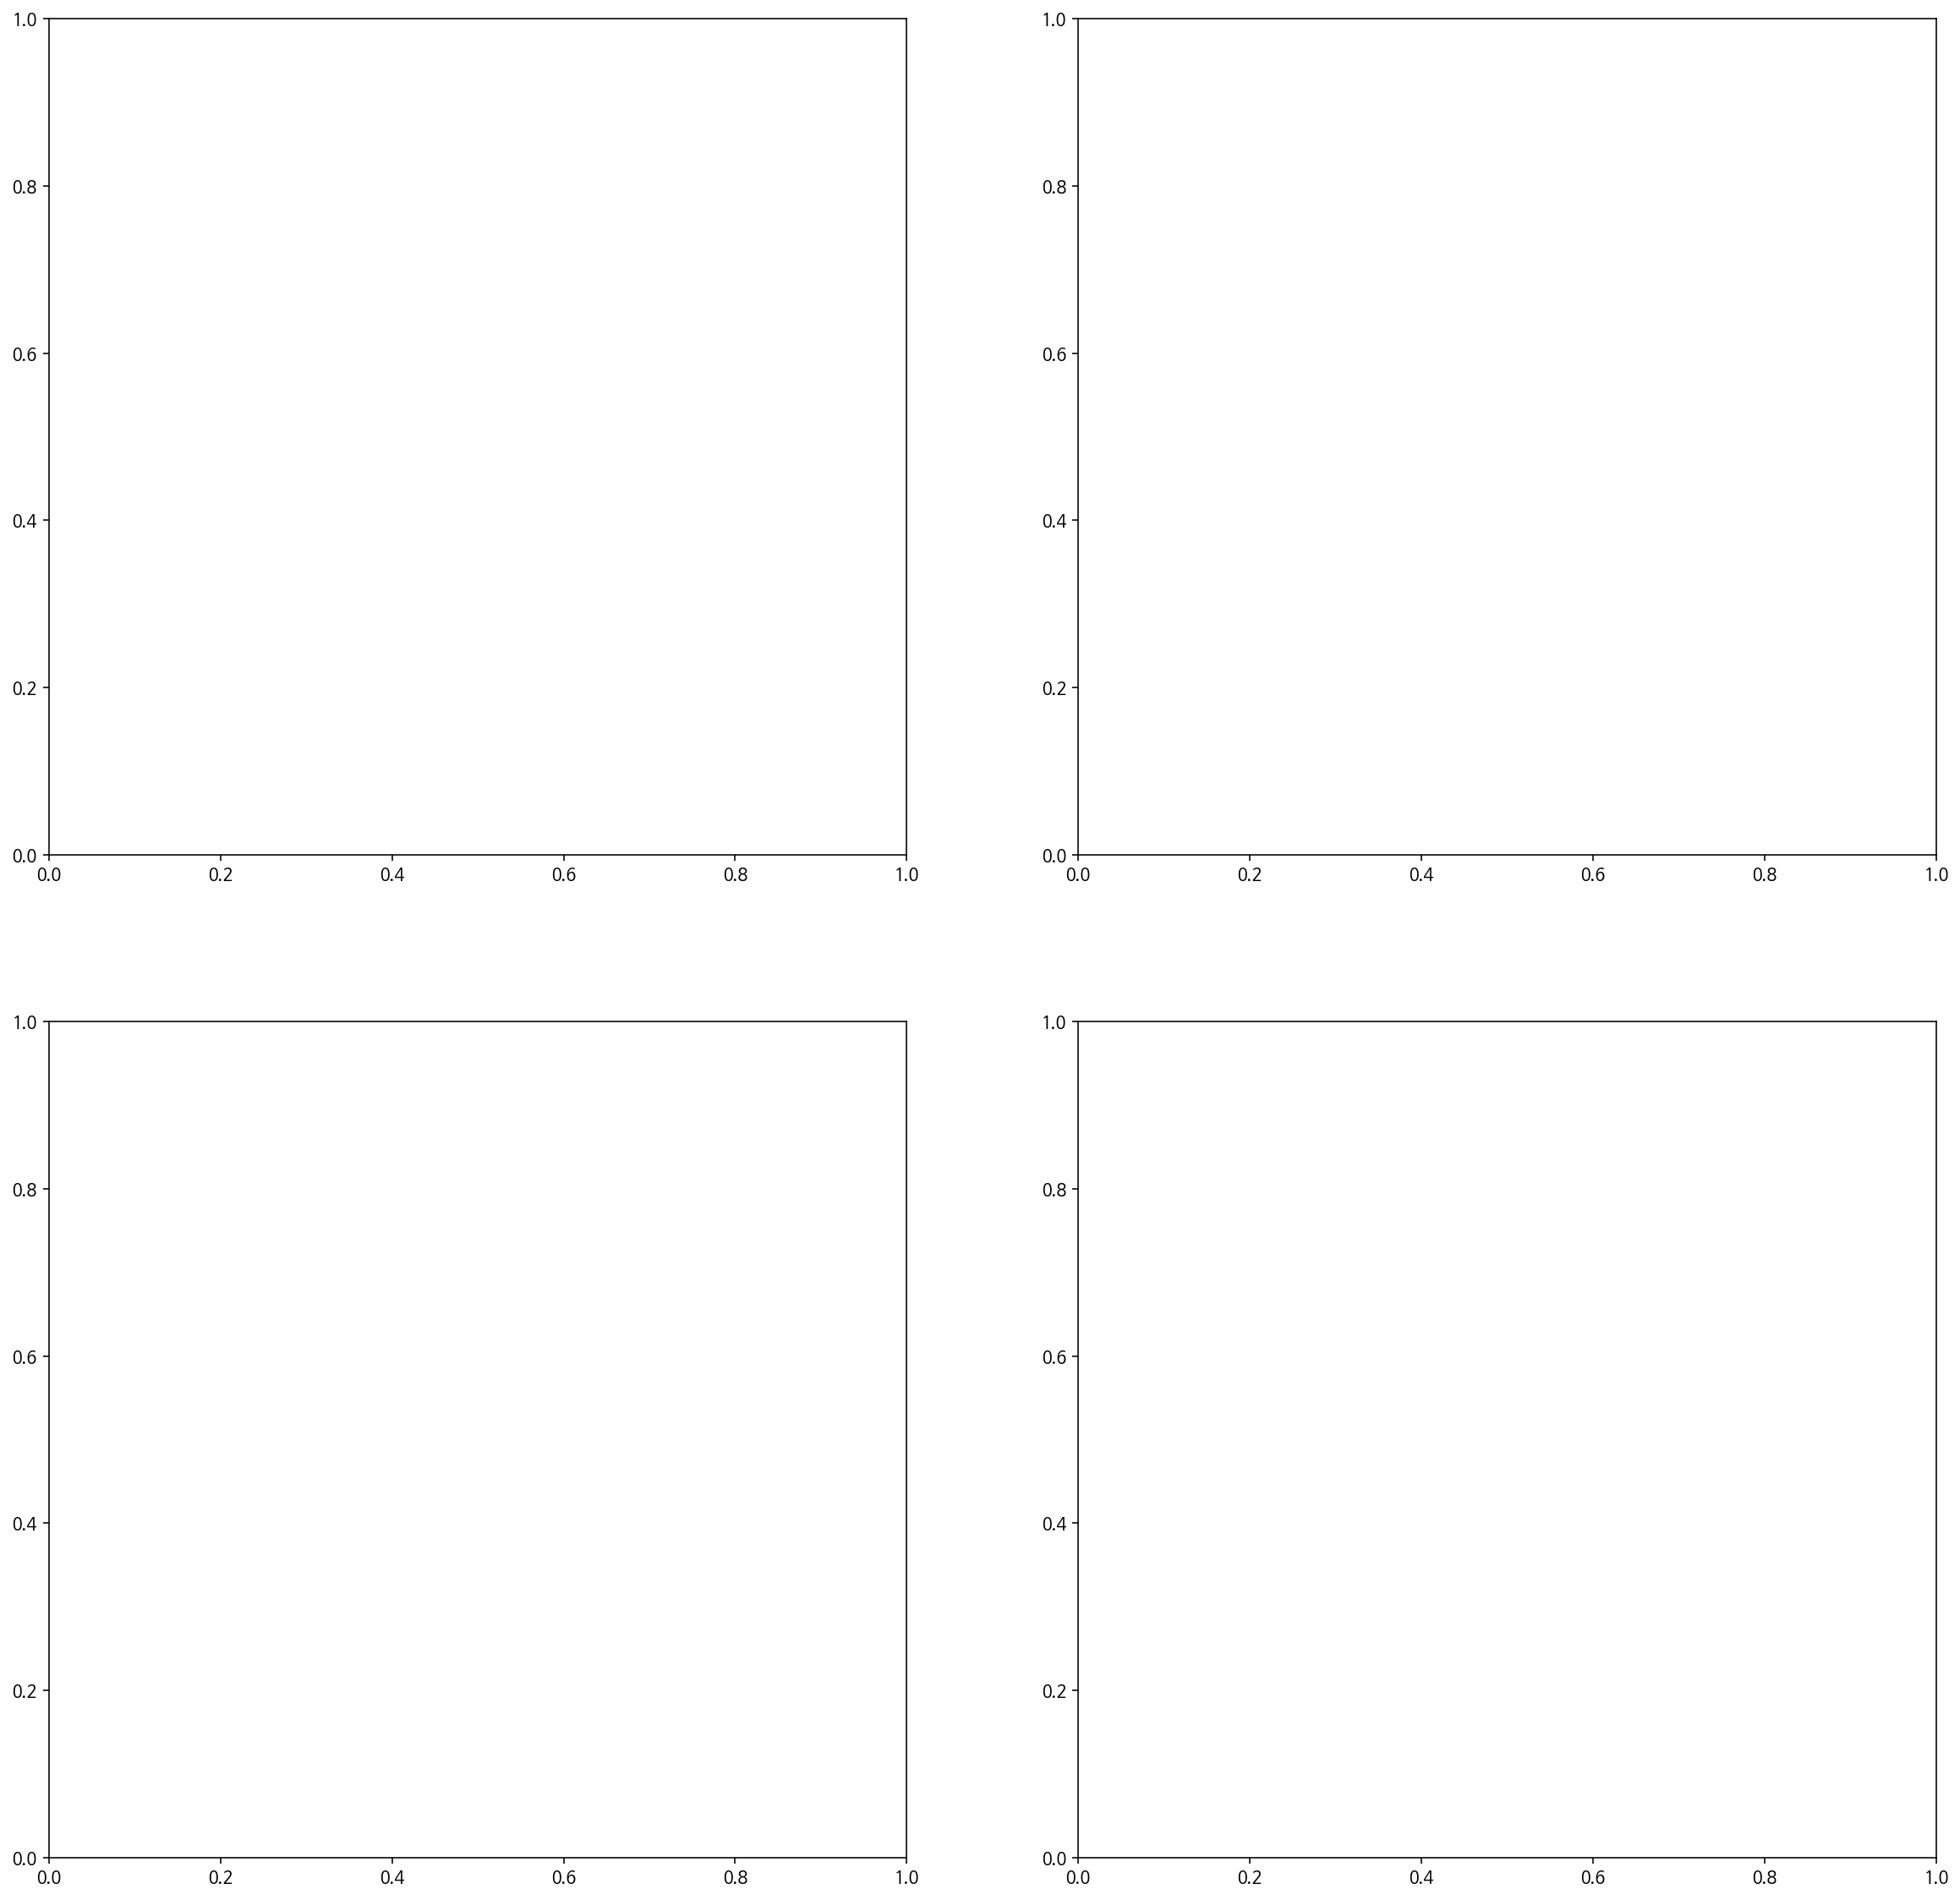

In [41]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=2,squeeze=False)
sns.lineplot(x = data['date'], y = data['cold'],ci=None,ax=axes[0][0]).set_title('2020년 감기 검색량',size=30)
sns.lineplot(x = data['date'], y = data['flu'],ci=None,ax=axes[0][0]).set_title('2020년 독감 검색량',size=30)
sns.lineplot(x = data['date'], y = data['pneumonia'],ci=None,ax=axes[0][0]).set_title('2020년 폐렴 검색량',size=30)
sns.lineplot(x = data['date'], y = data['coronavirus'],ci=None,ax=axes[0][0]).set_title('2020년 코로나 검색량',size=30)



#sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('가을 상위 5개 업종',size=30)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

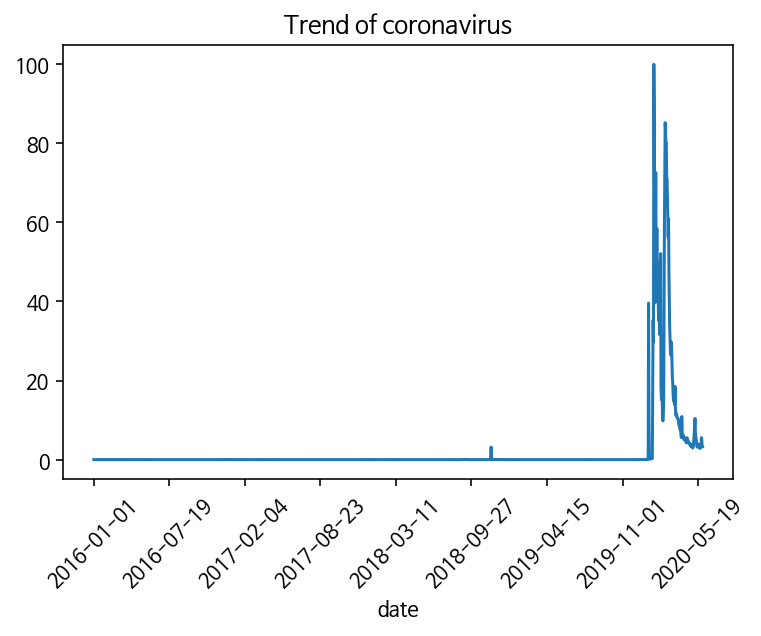

In [26]:
data = data.set_index('date')
data['coronavirus'].plot(title = 'Trend of coronavirus')
plt.xticks(rotation = 45)

In [69]:
data.index.is_unique # 불린값으로 중복된 날짜가 없음을 알 수 잇다.

True

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

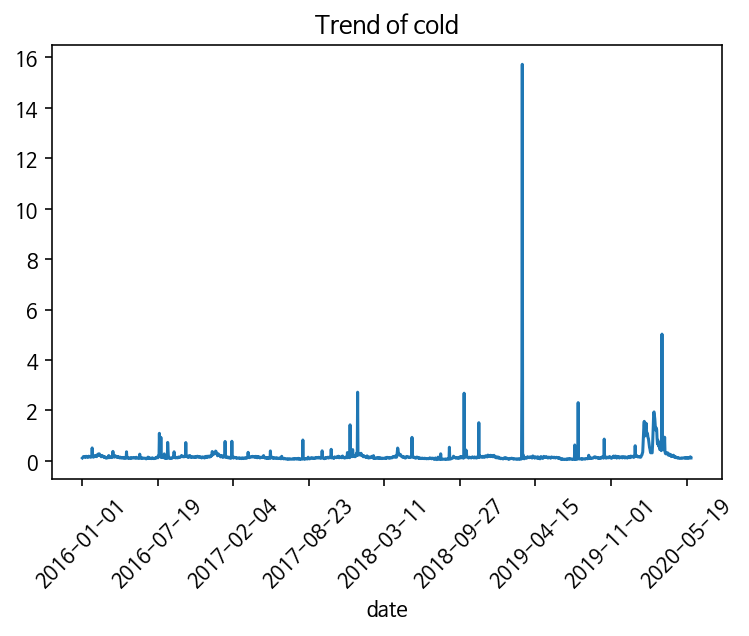

In [27]:
data['cold'].plot(title = 'Trend of cold')
plt.xticks(rotation = 45)

TypeError: plot got an unexpected keyword argument 'y'

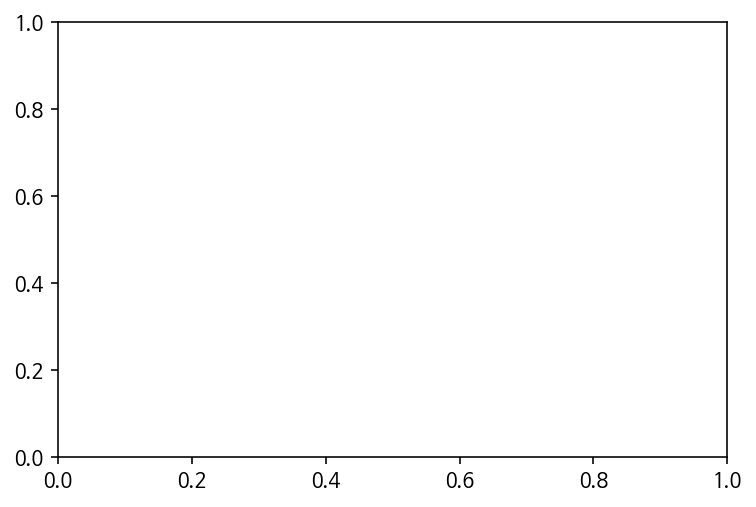

In [39]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot( y=a['flu'],color='green')

ax2 = ax1.twinx()
ax2.plot(x = data['date'], y=data['cold'])

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

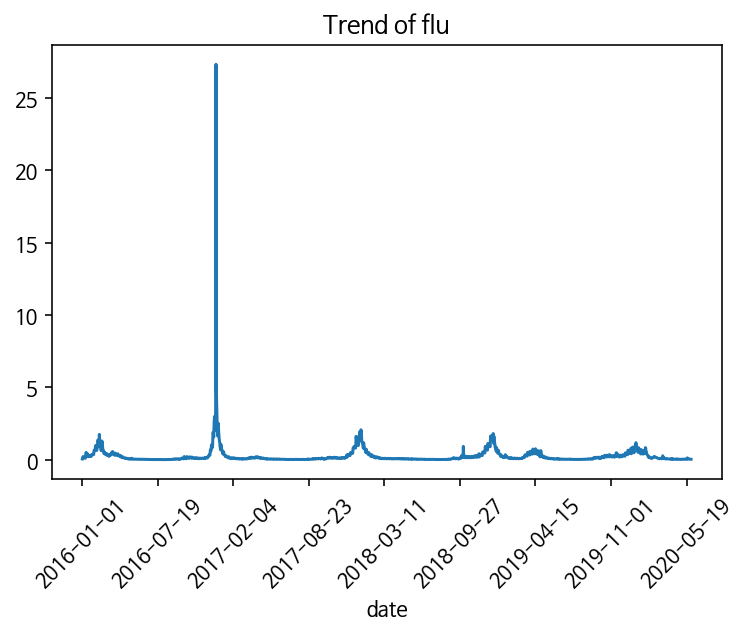

In [31]:
data['flu'].plot(title = 'Trend of flu')
plt.xticks(rotation = 45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

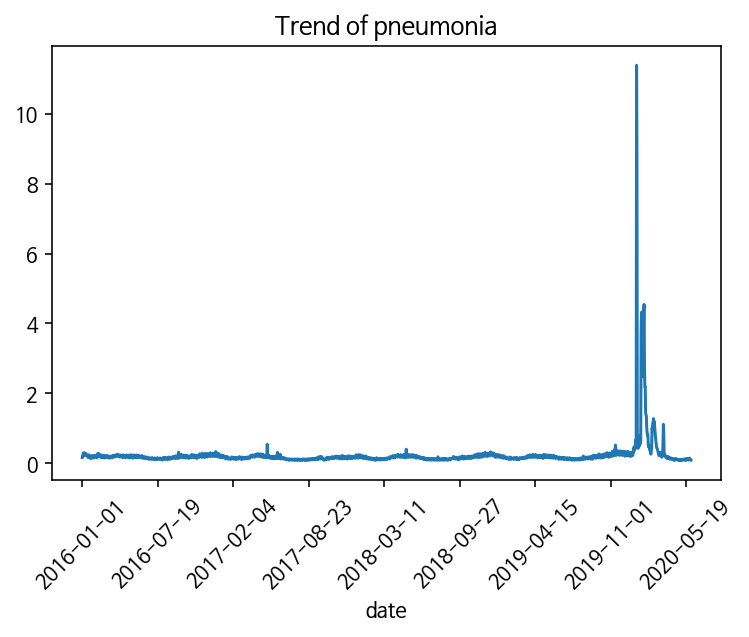

In [30]:
data['pneumonia'].plot(title = 'Trend of pneumonia')
plt.xticks(rotation = 45)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

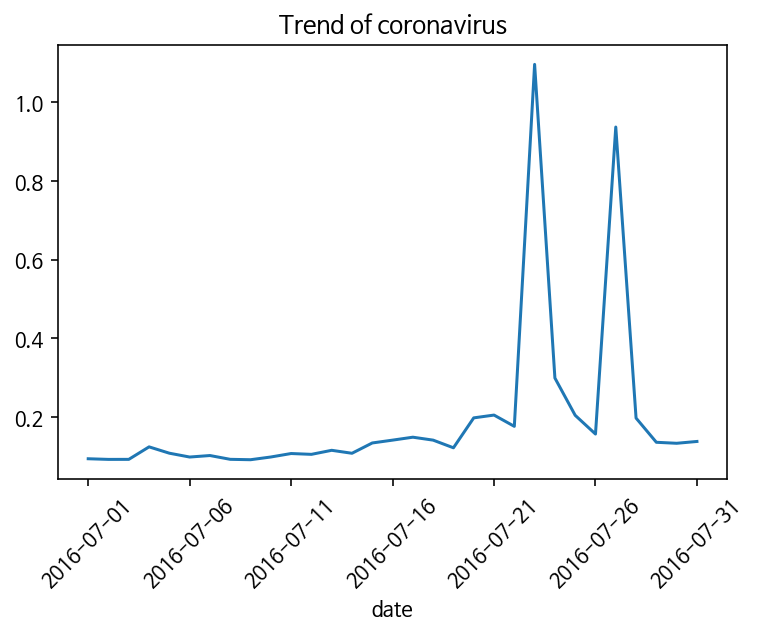

In [72]:
data['cold']['2016-07-01':'2016-07-31'].plot(title = 'Trend of coronavirus')
plt.xticks(rotation = 45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

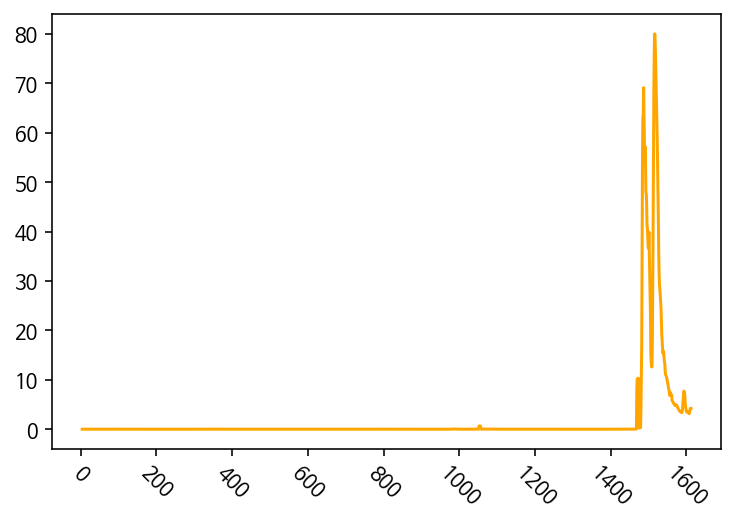

In [76]:
roll_mean5= pd.Series.rolling(data['coronavirus'], window=5, center = False).mean()
roll_mean5.plot(color='orange')
plt.xticks(rotation=-45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

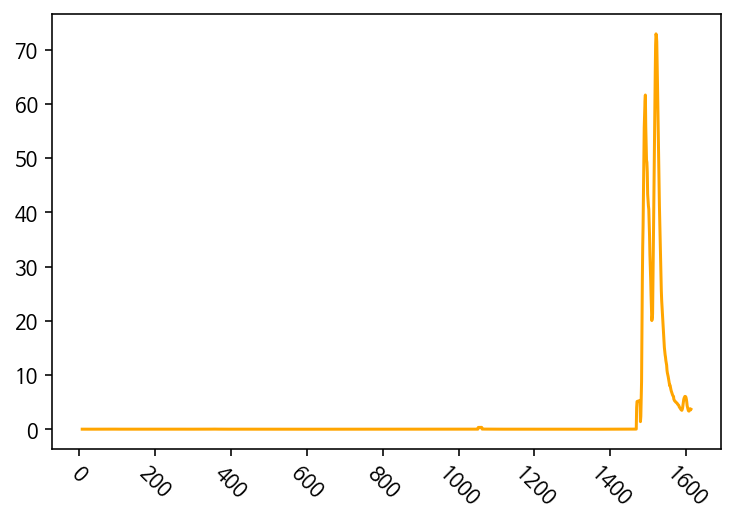

In [77]:
roll_mean10= pd.Series.rolling(data['coronavirus'], window=10, center = False).mean()
roll_mean10.plot(color='orange')
plt.xticks(rotation=-45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

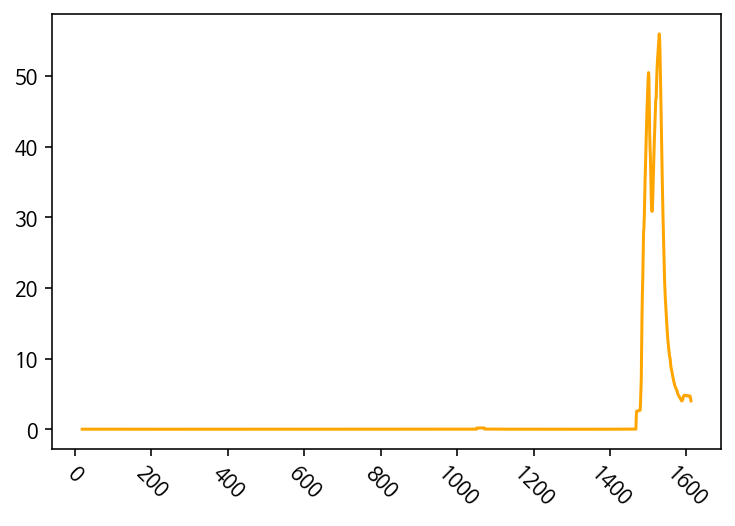

In [78]:
roll_mean20= pd.Series.rolling(data['coronavirus'], window=20, center = False).mean()
roll_mean20.plot(color='orange')
plt.xticks(rotation=-45)

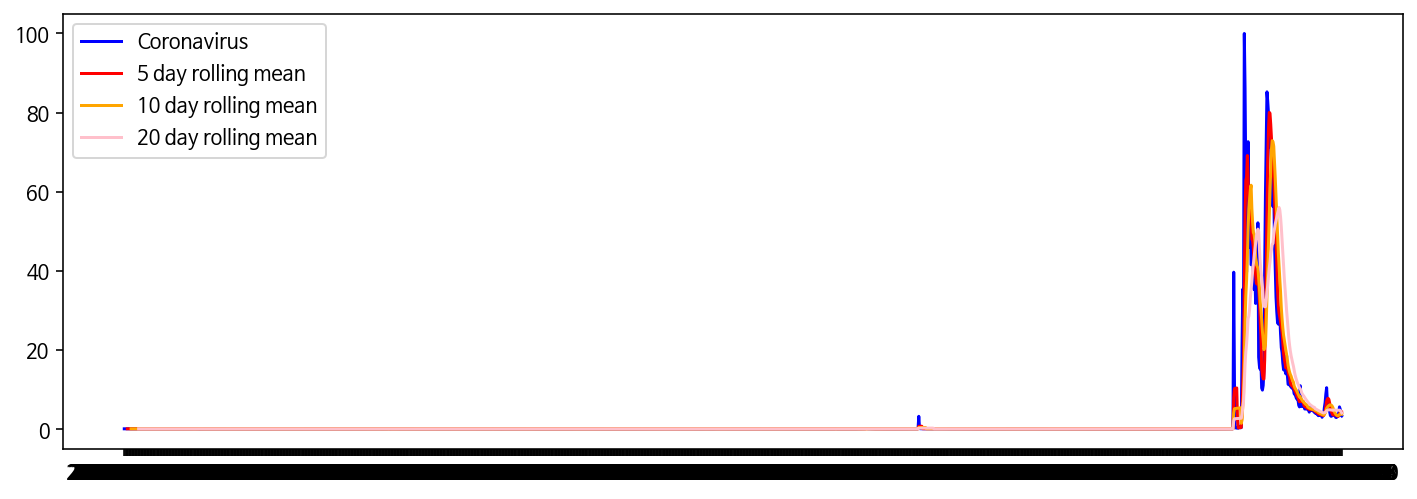

In [81]:
# subplot 적용
fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(data['coronavirus'], color='blue' , label='Coronavirus')
chart.plot(roll_mean5, color='red' , label='5 day rolling mean')
chart.plot(roll_mean10, color='orange' , label='10 day rolling mean')
chart.plot(roll_mean20, color='pink' , label='20 day rolling mean')
plt.legend(loc = 'best')


In [82]:
#https://joyfuls.tistory.com/54

<IPython.core.display.Javascript object>


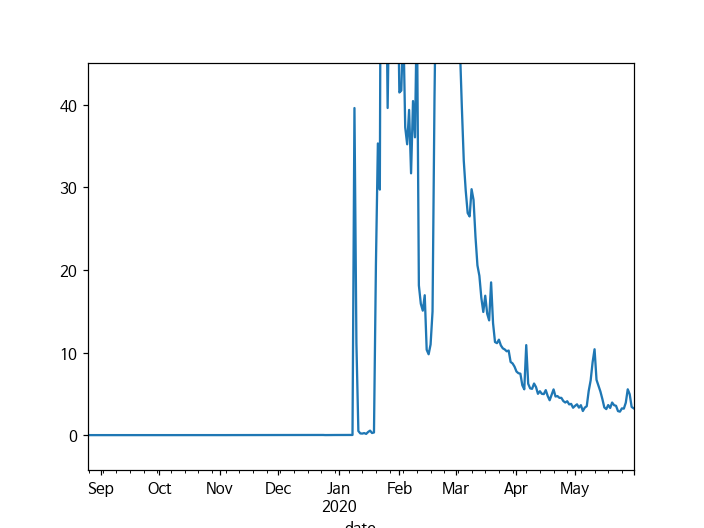

In [14]:
#https://enjoyiot.tistory.com/entry/Visualization-with-Pandas-4-Pandas%EB%A5%BC-%ED%86%B5%ED%95%9C-%EC%8B%9C%EA%B0%84%EB%B3%84-%EC%8B%9C%EA%B0%81%ED%99%94
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

mcdon = pd.read_csv('C:/Users/HOME/Desktop/수DA쟁이/20201127_TEAMPROJECT_4/코로나19/coronavirusdataset_20200601/SearchTrend.csv',index_col='date',parse_dates=True)

mcdon['coronavirus'].plot()